In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/spambase_csv_Kaggle.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

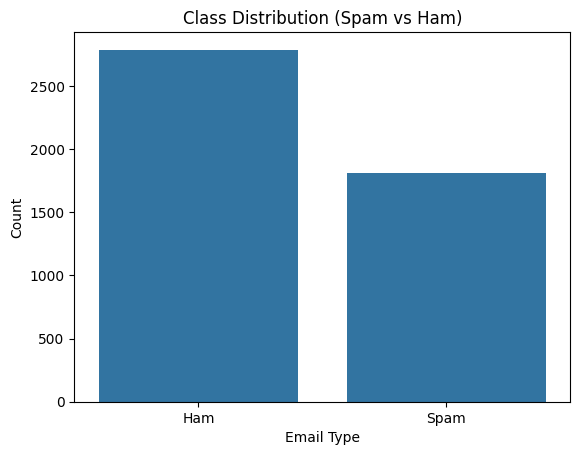

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="class", data=df)
plt.xticks([0, 1], ["Ham", "Spam"])
plt.title("Class Distribution (Spam vs Ham)")
plt.xlabel("Email Type")
plt.ylabel("Count")

plt.savefig("classDistribution.png",
            dpi=300,
            bbox_inches="tight")
plt.show()

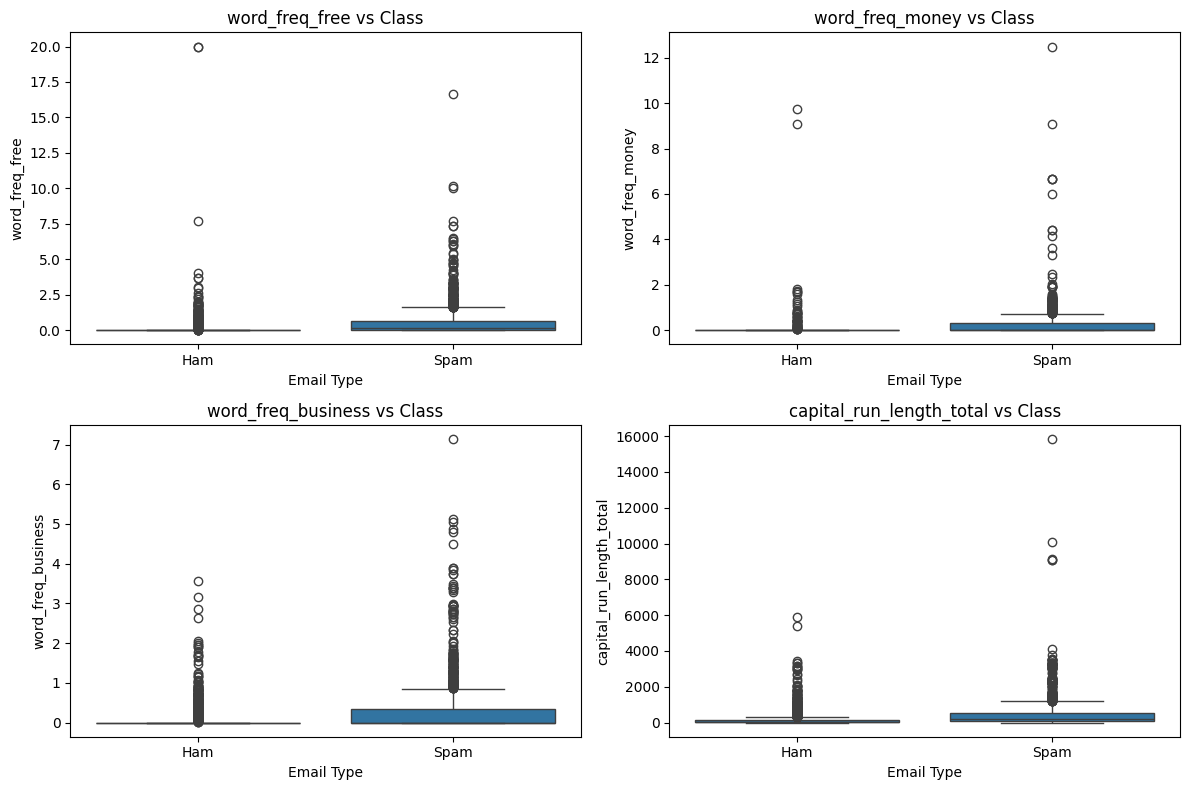

In [5]:
features = [
    "word_freq_free",
    "word_freq_money",
    "word_freq_business",
    "capital_run_length_total"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        x="class",
        y=feature,
        data=df,
        order=[0, 1],
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Class")
    axes[i].set_xlabel("Email Type")
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["Ham", "Spam"])

plt.tight_layout()
plt.savefig("boxPlotsImportantFeatures.png",
            dpi=300,
            bbox_inches="tight")

plt.show()

In [6]:
x_drp = df.drop('class', axis = 1)
y = df['class']

In [7]:
from sklearn.preprocessing import StandardScaler
import time
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_drp)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train_scaled,y,random_state=42, stratify= y, test_size= 0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()

In [12]:
start = time.time()
lr.fit(X_train,y_train)
end = time.time()

In [13]:
y_val_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score,
roc_curve, average_precision_score
)

In [15]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



In [16]:
train_time_lr = time.time() - start

lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_val_pred),
    "Precision": precision_score(y_test, y_val_pred),
    "Recall": recall_score(y_test, y_val_pred),
    "F1": f1_score(y_test, y_val_pred),
    "Training Time (s)": train_time_lr
}

lr_metrics

{'Accuracy': 0.9294245385450597,
 'Precision': 0.9209039548022598,
 'Recall': 0.8980716253443526,
 'F1': 0.9093444909344491,
 'Training Time (s)': 10.978553771972656}

In [17]:
from sklearn.model_selection import RandomizedSearchCV

lr_param_dist = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

lr_random = RandomizedSearchCV(
    LogisticRegression(max_iter=5000),
    lr_param_dist,
    n_iter=8,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

lr_random.fit(X_train, y_train)

E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=5000)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",8
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if N

In [37]:
y_val_pred = lr_random.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_val_pred)) 
print("Precision Score",precision_score(y_test, y_val_pred)) 
print("Recall",recall_score(y_test, y_val_pred))
print("F1", f1_score(y_test, y_val_pred))
print(lr_random.best_params_)

Accuracy 0.9294245385450597
Precision Score 0.9209039548022598
Recall 0.8980716253443526
F1 0.9093444909344491
{'solver': 'saga', 'penalty': 'l2', 'C': 1}


In [19]:
lr_random.best_estimator_

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

In [20]:
from sklearn.svm import SVC

kernels = ["linear", "poly", "rbf", "sigmoid"]

svm_kernel_results = {}

svm_kernel_models = {}

for k in kernels:
    start = time.time()

    svm = SVC(kernel=k)
    svm.fit(X_train, y_train)

    train_time = time.time() - start

    preds = svm.predict(X_test)

    svm_kernel_results[k] = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "Training Time (s)": train_time
    }
    
    svm_kernel_models[k] = svm

svm_kernel_results

{'linear': {'Accuracy': 0.9305103148751357,
  'F1': 0.9106145251396648,
  'Training Time (s)': 0.670973539352417},
 'poly': {'Accuracy': 0.7795874049945711,
  'F1': 0.6219739292364991,
  'Training Time (s)': 0.5335068702697754},
 'rbf': {'Accuracy': 0.9272529858849077,
  'F1': 0.9055007052186178,
  'Training Time (s)': 0.3566734790802002},
 'sigmoid': {'Accuracy': 0.8838219326818675,
  'F1': 0.8524137931034482,
  'Training Time (s)': 0.3397939205169678}}

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm_param_dist = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}

svm_random = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svm_param_dist,
    n_iter=20,          # try 20 random combos
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

svm_random.fit(X_train, y_train)

svm_random.best_params_, svm_random.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 1},
 np.float64(0.9339673913043478))

In [22]:
best_lr = lr_random.best_estimator_
best_svm = svm_random.best_estimator_

lr_test_preds = best_lr.predict(X_test)

svm_test_preds = best_svm.predict(X_test)

from sklearn.metrics import classification_report

print("LOGISTIC REGRESSION TEST\n", classification_report(y_test, lr_test_preds))
print("SVM TEST\n", classification_report(y_test, svm_test_preds))

LOGISTIC REGRESSION TEST
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

SVM TEST
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [24]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(best_lr, X_train, y_train, cv=5)
svm_cv = cross_val_score(best_svm, X_train, y_train, cv=5)

lr_cv, svm_cv

E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
E:\SSN Practicals\Lab Code\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 

(array([0.9375    , 0.91440217, 0.92119565, 0.91576087, 0.92663043]),
 array([0.94565217, 0.93342391, 0.92798913, 0.92255435, 0.94021739]))

In [25]:
import numpy as np

for i in range(5):
    print(f"Fold {i+1}: LR={lr_cv[i]:.4f}  SVM={svm_cv[i]:.4f}")

print("Average LR:", lr_cv.mean())
print("Average SVM:", svm_cv.mean())

Fold 1: LR=0.9375  SVM=0.9457
Fold 2: LR=0.9144  SVM=0.9334
Fold 3: LR=0.9212  SVM=0.9280
Fold 4: LR=0.9158  SVM=0.9226
Fold 5: LR=0.9266  SVM=0.9402
Average LR: 0.9230978260869565
Average SVM: 0.9339673913043478


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_and_save_confusion_matrix(y_true,y_pred,filename,title=None,dpi=300):
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    if title:
        plt.title(title)

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

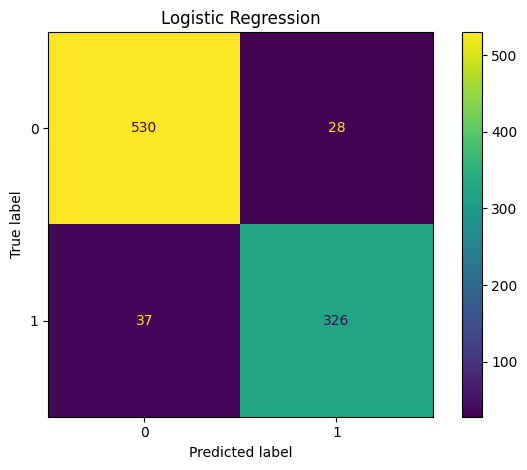

In [27]:
y_test_pred_lr = lr.predict(X_test)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_lr,
    filename="cm_logistic_normal_test.png",
    title="Logistic Regression"
)

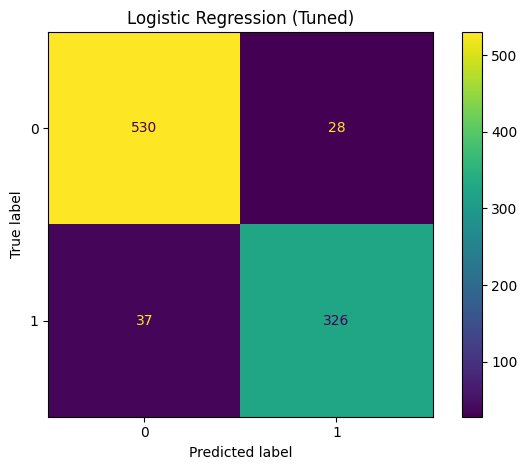

In [28]:
y_test_pred_lr = best_lr.predict(X_test)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_lr,
    filename="cm_logistic_test.png",
    title="Logistic Regression (Tuned)"
)

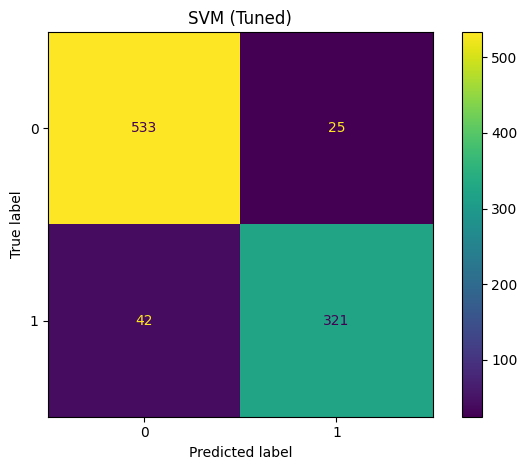

In [29]:
y_test_pred_svm = svm_random.best_estimator_.predict(X_test)

plot_and_save_confusion_matrix(
    y_test,
    y_test_pred_svm,
    filename="cm_svm_test.png",
    title="SVM (Tuned)"
)

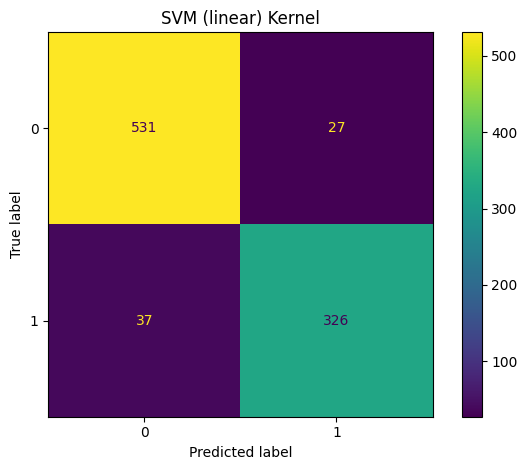

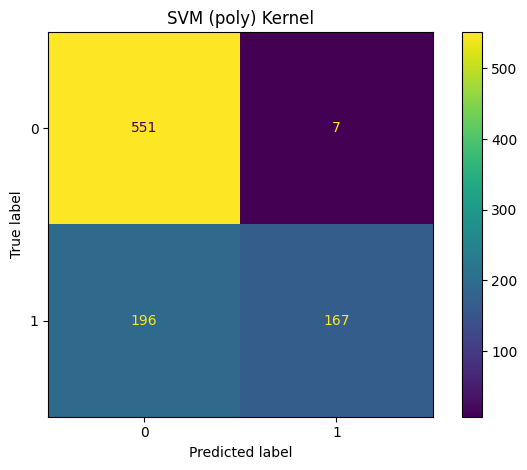

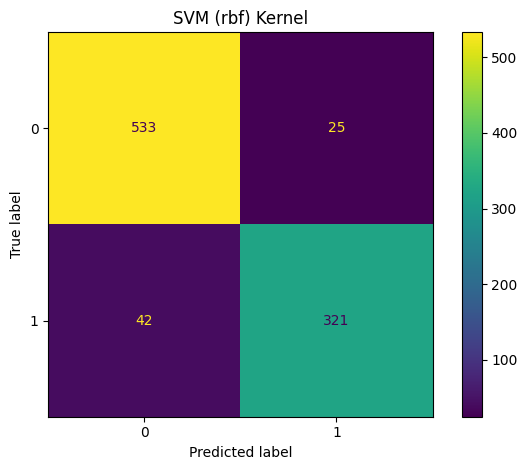

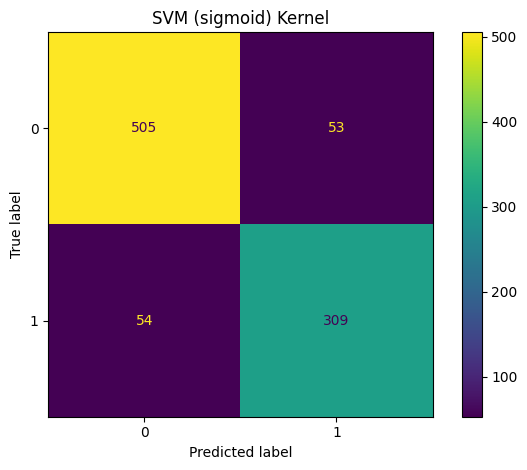

In [30]:
for kernel, model in svm_kernel_models.items():

    preds = model.predict(X_test)

    plot_and_save_confusion_matrix(
        y_test,
        preds,
        filename=f"cm_svm_{kernel}.png",
        title=f"SVM ({kernel}) Kernel"
    )

In [31]:
from sklearn.metrics import roc_curve, auc

def plot_multi_roc(y_true,model_scores_dict,filename,title="ROC Curves",dpi=300):
    plt.figure()
    for name, scores in model_scores_dict.items():
        fpr, tpr, _ = roc_curve(y_true, scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

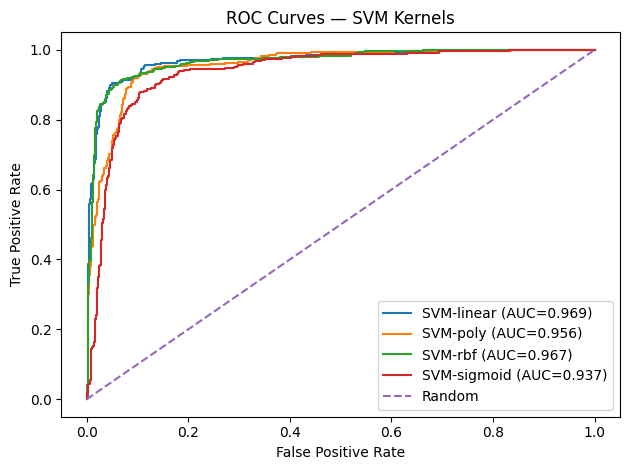

In [32]:
svm_kernel_scores = {}

for kernel, model in svm_kernel_models.items():
    scores = model.decision_function(X_test)

    svm_kernel_scores[f"SVM-{kernel}"] = scores


plot_multi_roc(
    y_test,
    svm_kernel_scores,
    filename="roc_svm_all_kernels.png",
    title="ROC Curves — SVM Kernels"
)

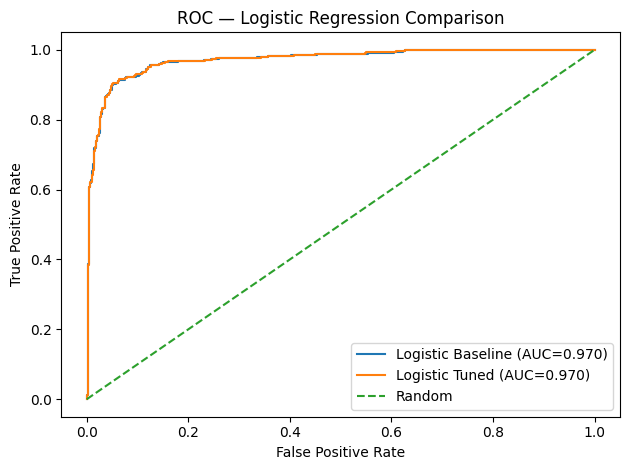

In [33]:
lr_baseline_scores = lr.predict_proba(X_test)[:, 1]
lr_best_scores = best_lr.predict_proba(X_test)[:, 1]

plot_multi_roc(
    y_test,
    {
        "Logistic Baseline": lr_baseline_scores,
        "Logistic Tuned": lr_best_scores
    },
    filename="roc_logistic_baseline_vs_tuned.png",
    title="ROC — Logistic Regression Comparison"
)

In [34]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,X,y,filename,title="Learning Curve",cv=5,scoring="accuracy",dpi=300):
    train_sizes, train_scores, val_scores = learning_curve(estimator,X,y,cv=cv,scoring=scoring,
                                                           train_sizes=np.linspace(0.1, 1.0, 6),n_jobs=-1)

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, marker="o", label="Training Accuracy")
    plt.plot(train_sizes, val_mean, marker="o", label="Validation Accuracy")

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()

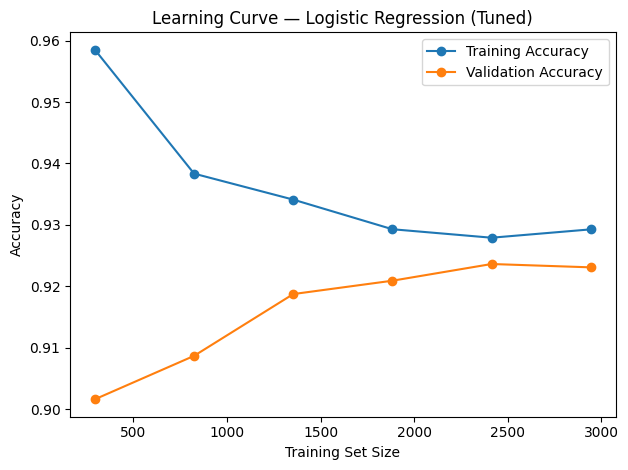

In [35]:
plot_learning_curve(best_lr,X_train,y_train,filename="learning_curve_logistic.png",
                    title="Learning Curve — Logistic Regression (Tuned)")

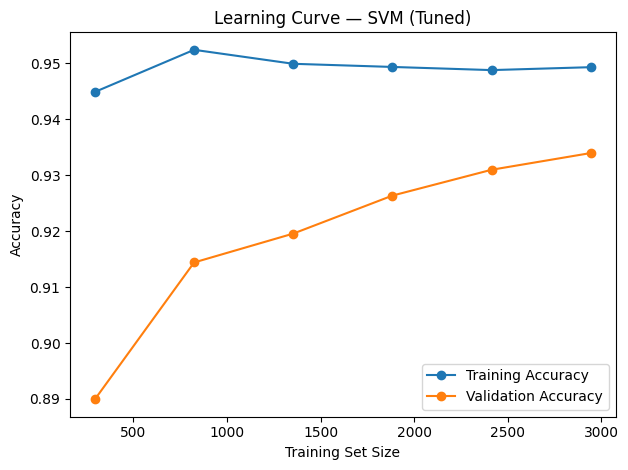

In [36]:
plot_learning_curve( svm_random.best_estimator_,X_train,y_train,filename="learning_curve_svm.png",
                    title="Learning Curve — SVM (Tuned)")